In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

['olivetti-faces', 'sign-language-digits-dataset']


In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X = np.load('/kaggle/input/sign-language-digits-dataset/X.npy')
Y = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy')

X.shape

(2062, 64, 64)

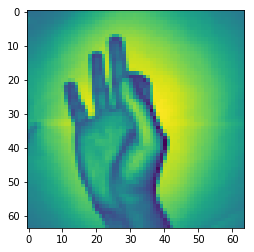

In [28]:
plt.imshow(X[0])

In [29]:
9 - np.argmax(Y[0])

9

In [30]:
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [31]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1, max_iter = 500)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.37964458804523427


In [33]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca_dims2 = PCA()
pca_dims2.fit(X_train)
cumsum2 = np.cumsum(pca_dims2.explained_variance_ratio_)
d2 = np.argmax(cumsum2 >= 0.90) + 1

pca_dims3 = PCA()
pca_dims3.fit(X_train)
cumsum3 = np.cumsum(pca_dims3.explained_variance_ratio_)
d3 = np.argmax(cumsum3 >= 0.75) + 1

pca_dims4 = PCA()
pca_dims4.fit(X_train)
cumsum4 = np.cumsum(pca_dims4.explained_variance_ratio_)
d4 = np.argmax(cumsum4 >= 0.50) + 1

pca_dims5 = PCA()
pca_dims5.fit(X_train)
cumsum5 = np.cumsum(pca_dims5.explained_variance_ratio_)
d5 = np.argmax(cumsum5 >= 0.25) + 1

In [35]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

pca2 = PCA(n_components=d2)
X_reduced2 = pca2.fit_transform(X_train)
X_recovered2 = pca2.inverse_transform(X_reduced2)

pca3 = PCA(n_components=d3)
X_reduced3 = pca3.fit_transform(X_train)
X_recovered3 = pca3.inverse_transform(X_reduced3)

pca4 = PCA(n_components=d4)
X_reduced4 = pca4.fit_transform(X_train)
X_recovered4 = pca4.inverse_transform(X_reduced4)

pca5 = PCA(n_components=d5)
X_reduced5 = pca5.fit_transform(X_train)
X_recovered5 = pca5.inverse_transform(X_reduced5)

In [36]:
print("reduced shape: " + str(X_reduced.shape))
print("reduced shape2: " + str(X_reduced2.shape))
print("reduced shape3: " + str(X_reduced3.shape))
print("reduced shape4: " + str(X_reduced4.shape))
print("reduced shape5: " + str(X_reduced5.shape))
print("recovered shape: " + str(X_recovered.shape))
print("recovered shape2: " + str(X_recovered2.shape))
print("recovered shape3: " + str(X_recovered3.shape))
print("recovered shape4: " + str(X_recovered4.shape))
print("recovered shape5: " + str(X_recovered5.shape))

reduced shape: (1443, 292)
reduced shape2: (1443, 168)
reduced shape3: (1443, 55)
reduced shape4: (1443, 14)
reduced shape5: (1443, 4)
recovered shape: (1443, 4096)
recovered shape2: (1443, 4096)
recovered shape3: (1443, 4096)
recovered shape4: (1443, 4096)
recovered shape5: (1443, 4096)


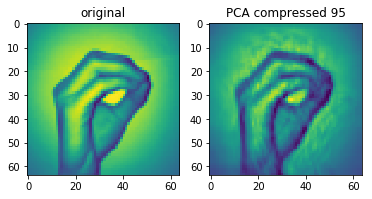

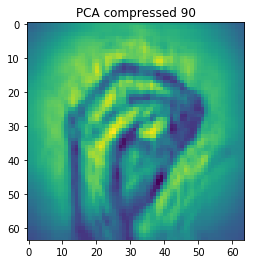

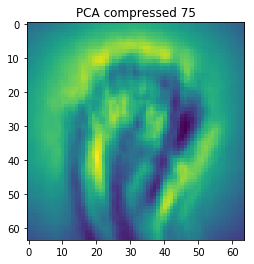

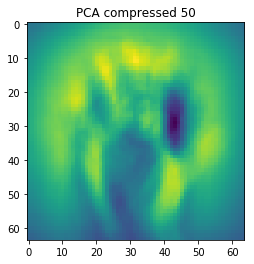

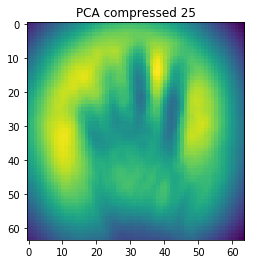

In [37]:
f = plt.figure()
f.add_subplot(1,2, 1)

plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed 95")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

plt.title("PCA compressed 90")
plt.imshow(X_recovered2[0].reshape((64,64)))
plt.show(block=True)

plt.title("PCA compressed 75")
plt.imshow(X_recovered3[0].reshape((64,64)))
plt.show(block=True)

plt.title("PCA compressed 50")
plt.imshow(X_recovered4[0].reshape((64,64)))
plt.show(block=True)

plt.title("PCA compressed 25")
plt.imshow(X_recovered5[0].reshape((64,64)))
plt.show(block=True)

In [38]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced.fit(X_reduced, y_train)

X_test_reduced = pca.transform(X_test)
y_hat_reduced = clf_reduced.predict(X_test_reduced)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

clf_reduced2 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced2.fit(X_reduced2, y_train)

X_test_reduced2 = pca2.transform(X_test)
y_hat_reduced2 = clf_reduced2.predict(X_test_reduced2)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced2)))

clf_reduced3 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced3.fit(X_reduced3, y_train)

X_test_reduced3 = pca3.transform(X_test)
y_hat_reduced3 = clf_reduced3.predict(X_test_reduced3)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced3)))

clf_reduced4 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced4.fit(X_reduced4, y_train)

X_test_reduced4 = pca4.transform(X_test)
y_hat_reduced4 = clf_reduced4.predict(X_test_reduced4)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced4)))

clf_reduced5 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced5.fit(X_reduced5, y_train)

X_test_reduced5 = pca5.transform(X_test)
y_hat_reduced5 = clf_reduced5.predict(X_test_reduced5)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced5)))

accuracy: 0.6801292407108239
accuracy: 0.6833602584814217
accuracy: 0.7431340872374798


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy: 0.5993537964458805
accuracy: 0.13893376413570274


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
data=np.load("/kaggle/input/olivetti-faces/olivetti_faces.npy")
target=np.load("/kaggle/input/olivetti-faces/olivetti_faces_target.npy")

In [40]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [41]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


In [42]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1, max_iter = 500)
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.075


In [43]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca_dims2 = PCA()
pca_dims2.fit(X_train)
cumsum2 = np.cumsum(pca_dims2.explained_variance_ratio_)
d2 = np.argmax(cumsum2 >= 0.90) + 1

pca_dims3 = PCA()
pca_dims3.fit(X_train)
cumsum3 = np.cumsum(pca_dims3.explained_variance_ratio_)
d3 = np.argmax(cumsum3 >= 0.75) + 1

pca_dims4 = PCA()
pca_dims4.fit(X_train)
cumsum4 = np.cumsum(pca_dims4.explained_variance_ratio_)
d4 = np.argmax(cumsum4 >= 0.50) + 1

pca_dims5 = PCA()
pca_dims5.fit(X_train)
cumsum5 = np.cumsum(pca_dims5.explained_variance_ratio_)
d5 = np.argmax(cumsum5 >= 0.25) + 1

pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

pca2 = PCA(n_components=d2)
X_reduced2 = pca2.fit_transform(X_train)
X_recovered2 = pca2.inverse_transform(X_reduced2)

pca3 = PCA(n_components=d3)
X_reduced3 = pca3.fit_transform(X_train)
X_recovered3 = pca3.inverse_transform(X_reduced3)

pca4 = PCA(n_components=d4)
X_reduced4 = pca4.fit_transform(X_train)
X_recovered4 = pca4.inverse_transform(X_reduced4)

pca5 = PCA(n_components=d5)
X_reduced5 = pca5.fit_transform(X_train)
X_recovered5 = pca5.inverse_transform(X_reduced5)

print("reduced shape: " + str(X_reduced.shape))
print("reduced shape2: " + str(X_reduced2.shape))
print("reduced shape3: " + str(X_reduced3.shape))
print("reduced shape4: " + str(X_reduced4.shape))
print("reduced shape5: " + str(X_reduced5.shape))
print("recovered shape: " + str(X_recovered.shape))
print("recovered shape2: " + str(X_recovered2.shape))
print("recovered shape3: " + str(X_recovered3.shape))
print("recovered shape4: " + str(X_recovered4.shape))
print("recovered shape5: " + str(X_recovered5.shape))

reduced shape: (280, 105)
reduced shape2: (280, 60)
reduced shape3: (280, 18)
reduced shape4: (280, 4)
reduced shape5: (280, 2)
recovered shape: (280, 4096)
recovered shape2: (280, 4096)
recovered shape3: (280, 4096)
recovered shape4: (280, 4096)
recovered shape5: (280, 4096)


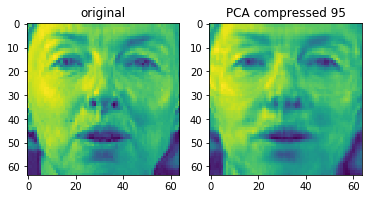

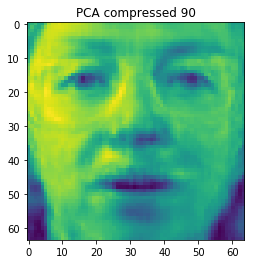

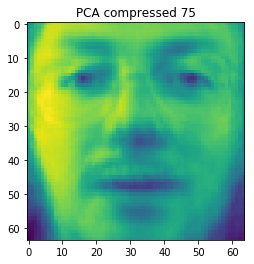

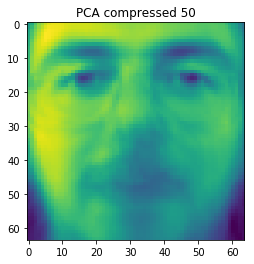

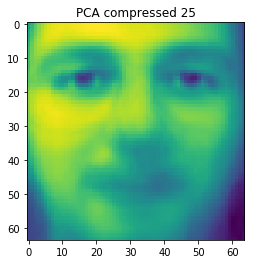

In [44]:
f = plt.figure()
f.add_subplot(1,2, 1)

plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed 95")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

plt.title("PCA compressed 90")
plt.imshow(X_recovered2[0].reshape((64,64)))
plt.show(block=True)

plt.title("PCA compressed 75")
plt.imshow(X_recovered3[0].reshape((64,64)))
plt.show(block=True)

plt.title("PCA compressed 50")
plt.imshow(X_recovered4[0].reshape((64,64)))
plt.show(block=True)

plt.title("PCA compressed 25")
plt.imshow(X_recovered5[0].reshape((64,64)))
plt.show(block=True)

In [46]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced.fit(X_reduced, y_train)

X_test_reduced = pca.transform(X_test)
y_hat_reduced = clf_reduced.predict(X_test_reduced)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

clf_reduced2 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced2.fit(X_reduced2, y_train)

X_test_reduced2 = pca2.transform(X_test)
y_hat_reduced2 = clf_reduced2.predict(X_test_reduced2)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced2)))

clf_reduced3 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced3.fit(X_reduced3, y_train)

X_test_reduced3 = pca3.transform(X_test)
y_hat_reduced3 = clf_reduced3.predict(X_test_reduced3)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced3)))

clf_reduced4 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced4.fit(X_reduced4, y_train)

X_test_reduced4 = pca4.transform(X_test)
y_hat_reduced4 = clf_reduced4.predict(X_test_reduced4)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced4)))

clf_reduced5 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter = 500)
clf_reduced5.fit(X_reduced5, y_train)

X_test_reduced5 = pca5.transform(X_test)
y_hat_reduced5 = clf_reduced5.predict(X_test_reduced5)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced5)))

accuracy: 0.85
accuracy: 0.8833333333333333
accuracy: 0.8583333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy: 0.55
accuracy: 0.21666666666666667


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
